## Logistic Regression

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### 1. Data preparation

In [126]:
mean1 = np.array([1,0.5])
cov1 = np.array([[1,0.1],[0.1,1.2]])

mean2 = np.array([5,5])
cov2 = np.array([[1.21,0.1],[0.1,1.3]])

# Normal Distribution
dist1 = np.random.multivariate_normal(mean1,cov1,500)
dist2 = np.random.multivariate_normal(mean2,cov2,500)
print(dist1.shape,dist2.shape)

(500, 2) (500, 2)


### 2. Data Visualisation

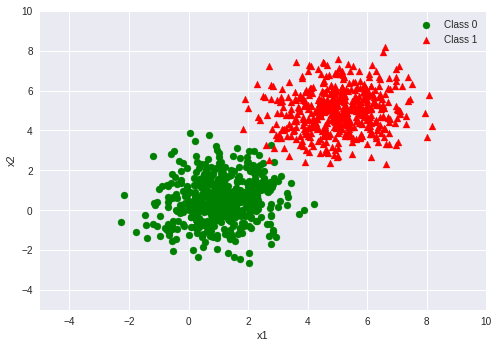

In [127]:
plt.scatter(dist1[:,0],dist1[:,1],color='green',label="Class 0")
plt.scatter(dist2[:,0],dist2[:,1],color="red",marker="^",label='Class 1')
plt.legend()
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### 3. Creating training and test data

In [128]:
# merging the data of both distribution in one
data  = np.zeros((1000,3))
data[:500,:2] = dist1
data[500:,:2] = dist2
data[500:,-1] = 1
np.random.shuffle(data)
print(data[:10])

[[ 4.81568777  5.96627204  1.        ]
 [ 1.76433568 -0.28556116  0.        ]
 [ 2.7934986   1.16810712  0.        ]
 [ 4.6702791   4.37523451  1.        ]
 [ 1.6399231   0.98486772  0.        ]
 [ 5.51316664  6.42302607  1.        ]
 [ 4.12271329  4.89790078  1.        ]
 [-0.61386259 -0.99590794  0.        ]
 [ 0.51559236 -0.01991887  0.        ]
 [ 0.98937553  1.53252933  0.        ]]


In [129]:
# divide the 80% of data as training data and 20% as test data
split = int(0.8*data.shape[0])
X_train = data[:split,:-1]
X_test = data[split:,:-1]
Y_train = data[:split,-1]
Y_test = data[split:,-1]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


### 4. Logistic Regression Functions

In [130]:
def hypothesis(x,theta,b):
    h = np.dot(x,theta)+b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def error(y_true,x,theta,b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],theta,b)
        err += y_true[i]*np.log2(hx)+(1-y_true[i])*np.log2(1-hx)
    return -err/m

def get_grads(y_true,x,theta,b):
    grad = np.zeros(theta.shape)
    grad_b = 0.0
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],theta,b)
        grad += (y_true[i]-hx)*x[i]
        grad_b += (y_true[i]-hx)
    grad /= m
    grad_b /= m
    return [grad,grad_b]

def grad_descent(x,y_true,theta,b,lr=0.1):
    err = error(y_true,x,theta,b)
    [grad,grad_b] = get_grads(y_true,x,theta,b)
    theta += lr*grad
    b += lr*grad_b
    return err,theta,b

def predict(x,theta,b):
    confidence = hypothesis(x,theta,b)
    if confidence < 0.5:
        return 0
    else:
        return 1
    
def get_accuracy(x_tst,y_tst,theta,b):
    y_pred = []
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],theta,b)
        y_pred.append(p)
    y_pred = np.array(y_pred)
    return float((y_pred==y_tst).sum())/y_tst.shape[0]

In [131]:
loss = []
accuracy = []
theta = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [132]:
for i in range(1000):
    e,theta,b = grad_descent(X_train,Y_train,theta,b,lr=0.5)
    accuracy.append(get_accuracy(X_test,Y_test,theta,b))
    loss.append(e)

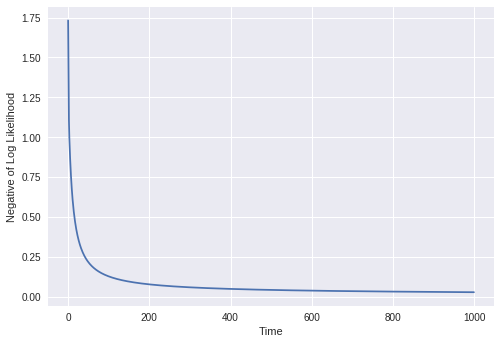

In [133]:
plt.plot(loss)
plt.xlabel("Time")
plt.ylabel("Negative of Log Likelihood")
plt.show()

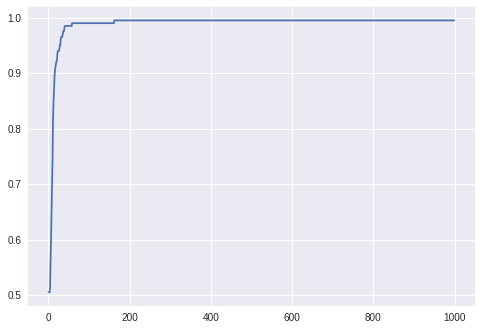

0.995


In [134]:
plt.plot(accuracy)
plt.show()
print(accuracy[-1])

### 5. Decision Boundary

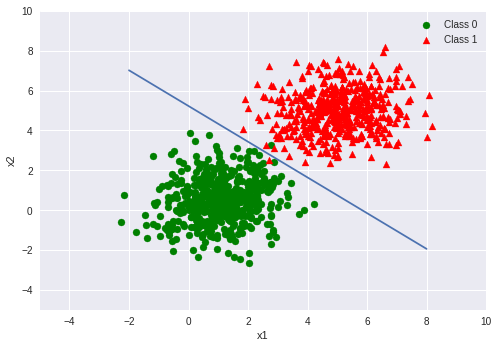

In [135]:
plt.scatter(dist1[:,0],dist1[:,1],color='green',label="Class 0")
plt.scatter(dist2[:,0],dist2[:,1],color="red",marker="^",label='Class 1')
plt.legend()
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
x = np.linspace(-2,8,10)
y = -(theta[0]*x+b)/theta[1]
plt.plot(x,y)
plt.show()

In [136]:
print(theta)
print(b)

[1.41108924 1.57488139]
-8.228024817101376
